In [1]:
import xgboost as xgb
import json
from make_plot_dir import plots_dir
from make_json_dir import json_dir
from model_objects import LOWOCV, FeatureSelector, GridSearchLOWOCV 
from sklearn.metrics import roc_curve, precision_score, f1_score
import matplotlib.pyplot as plt

In [2]:
%run rush-win-predictor-2v2-feature-selection-general.ipynb

FileNotFoundError: [Errno 2] No such file or directory: '../../data/pro_frames_merge_2v2.csv'

FileNotFoundError: [Errno 2] No such file or directory: '../../data/pro_frames_merge_2v2.csv'

In [4]:
pro_frames_merge_trunc[features].dtypes

width_in                    float64
width_out                   float64
depth_in                    float64
depth_out                   float64
s_in                        float64
                             ...   
max_squareness_delta        float64
harm_qb_squareness_delta    float64
mean_qb_squareness_delta    float64
rms_qb_squareness_delta     float64
max_qb_squareness_delta     float64
Length: 70, dtype: object

In [5]:
xgb_clf = xgb.XGBClassifier(objective = 'binary:logistic', 
                            seed=123,
                            tree_method = 'approx',
                            eval_metric = 'auc',
                            scale_pos_weight = 2,
                            base_score = 0.33,
                            enable_categorical = True,
                            early_stopping_rounds = 10)
xgbcv = LOWOCV(data = pro_frames_merge_trunc,
                 features = features,
                 target_col = 'rush_win',
                 num_weeks = num_weeks,
                 classifier = xgb_clf)

In [6]:
xgbcv.run_cv()

In [7]:
xgbcv.get_auc(), xgbcv.get_avg_train_auc(), xgbcv.get_f1()

(0.668206613462771, 0.8608526941386698, 0.4911968699982216)

In [8]:
xgbcv.get_top_n_features(n=20, return_scores = True)

mean_qb_squareness          0.054214
rms_qb_squareness           0.049576
penetrator_depth_delta      0.041653
mean_qb_squareness_delta    0.031762
rms_qb_squareness_delta     0.022929
stunt_type                  0.022586
depth_in                    0.022249
exchange                    0.021820
max_qb_squareness           0.021566
y_diff_delta                0.019719
rel_rotation_delta          0.019554
penetrator_depth            0.017703
y_diff                      0.017375
open_outside_in             0.017156
width_out_delta             0.016825
depth_in_delta              0.016623
s_in_delta                  0.016352
dist                        0.015802
width_in_delta              0.015697
rel_rotation                0.015680
dtype: float32

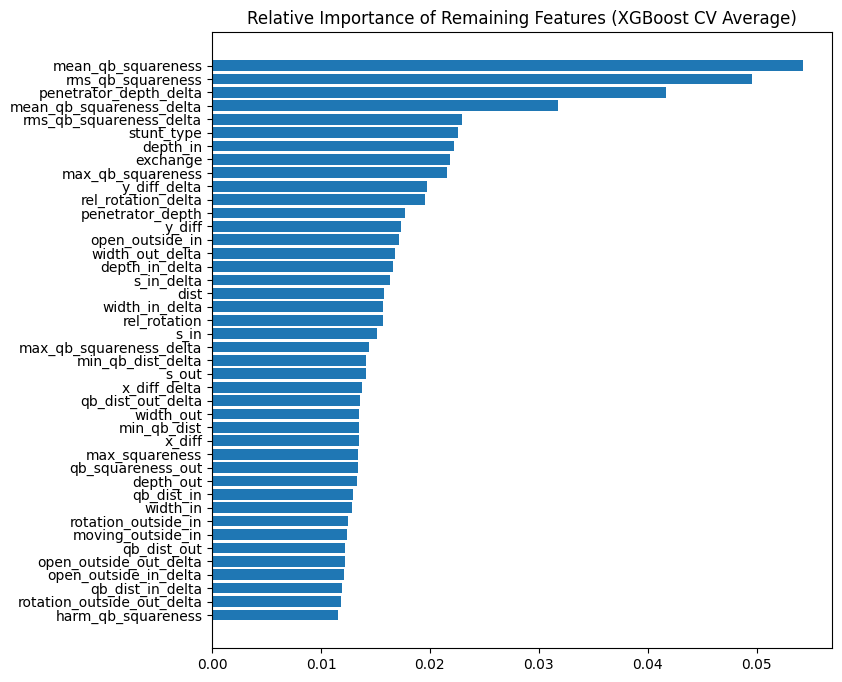

In [9]:
top_features_sorted = xgbcv.get_top_n_features(n=len(features2), return_scores = True).sort_values(ascending = True)
index = np.arange(0,len(top_features_sorted))
plt.figure(figsize = (8,8))
plt.barh(index, top_features_sorted)
labels = top_features_sorted.index.tolist()
plt.gca().set_yticks(index)
plt.gca().set_yticklabels(labels)
plt.title("Relative Importance of Remaining Features (XGBoost CV Average)")
plt.savefig(os.path.join(plots_dir, 'feat_importance.png'), bbox_inches = 'tight')

In [10]:
xgbcv.get_scores_by_frame('frame_from_overlap')

,count,pred,prob,f1_score,auc_score
frame_from_overlap,,,,,
-22,36,0.305556,0.443305,0.285714,0.600000
-21,93,0.215054,0.432055,0.326531,0.605334
-20,157,0.235669,0.433108,0.348837,0.572468
-19,232,0.275862,0.441687,0.358209,0.548016
-18,329,0.319149,0.450052,0.366197,0.547826
-17,440,0.315909,0.451195,0.354949,0.519469
-16,567,0.315697,0.456237,0.333333,0.542686
-15,664,0.355422,0.463670,0.363636,0.542162
-14,754,0.354111,0.462823,0.369524,0.537087


In [9]:
features2

['width_in',
 's_in',
 's_out',
 'a_in',
 'a_out',
 'squareness_in',
 'squareness_out',
 'open_outside_in',
 'open_outside_out',
 'moving_outside_in',
 'moving_outside_out',
 'rotation_outside_in',
 'rotation_outside_out',
 'x_diff',
 'y_diff',
 'dist',
 'min_qb_dist',
 'rel_rotation',
 'penetrator_depth',
 'mean_qb_squareness',
 'stunt_type',
 'exchange',
 'width_in_delta',
 's_in_delta',
 's_out_delta',
 'a_in_delta',
 'a_out_delta',
 'squareness_in_delta',
 'squareness_out_delta',
 'open_outside_in_delta',
 'open_outside_out_delta',
 'moving_outside_in_delta',
 'moving_outside_out_delta',
 'rotation_outside_in_delta',
 'rotation_outside_out_delta',
 'x_diff_delta',
 'y_diff_delta',
 'dist_delta',
 'min_qb_dist_delta',
 'rel_rotation_delta',
 'penetrator_depth_delta',
 'mean_qb_squareness_delta']

In [10]:
xgbcv.set_features(features2)
xgbcv.run_cv()

In [11]:
xgbcv.get_auc(), xgbcv.get_avg_train_auc(), xgbcv.get_f1()

(0.669388010099099, 0.853523777451867, 0.49499010019799605)

In [382]:
xgbcv.get_top_n_features(n=20, return_scores = True)

penetrator_depth_delta      0.067663
mean_qb_squareness          0.063837
mean_qb_squareness_delta    0.040094
exchange                    0.034200
s_in_delta                  0.033167
penetrator_depth            0.033130
stunt_type                  0.030967
rel_rotation_delta          0.030636
y_diff_delta                0.028277
y_diff                      0.027217
rel_rotation                0.026856
width_in_delta              0.026245
dist                        0.025118
min_qb_dist_delta           0.024718
open_outside_in             0.024481
s_out                       0.023366
s_in                        0.023179
open_outside_in_delta       0.023108
x_diff_delta                0.023002
x_diff                      0.022766
dtype: float32

In [383]:
xgbcv.get_scores_by_frame('frame_from_overlap')

,count,pred,prob,f1_score,auc_score
frame_from_overlap,,,,,
-22,36,0.277778,0.445849,0.400000,0.588462
-21,93,0.311828,0.451506,0.379310,0.612069
-20,157,0.305732,0.448624,0.350515,0.584656
-19,232,0.310345,0.446117,0.464789,0.645988
-18,329,0.340426,0.451425,0.427273,0.592572
-17,440,0.300000,0.455429,0.377622,0.551698
-16,567,0.340388,0.457429,0.392857,0.530397
-15,664,0.349398,0.460393,0.384279,0.532034
-14,754,0.335544,0.461409,0.344423,0.504997


In [413]:
# Forward selection
xgbcv.set_features(features2)
fw_feat_sel = FeatureSelector(xgbcv)
fw_feat_sel.sw_select_cust(start_features = [], fw_select_type = 'all', bw_select_type = 'none')

Testing features: ['a_in']
Test score = 0.4930
Testing features: ['a_in_delta']
Test score = 0.4983
Testing features: ['a_out']
Test score = 0.4937
Testing features: ['a_out_delta']
Test score = 0.5016
Testing features: ['dist']
Test score = 0.5194
Testing features: ['dist_delta']
Test score = 0.5147
Testing features: ['exchange']
Test score = 0.5071
Testing features: ['mean_qb_squareness']
Test score = 0.5531
Testing features: ['mean_qb_squareness_delta']
Test score = 0.5896
Testing features: ['min_qb_dist']
Test score = 0.5198
Testing features: ['min_qb_dist_delta']
Test score = 0.5113
Testing features: ['moving_outside_in']
Test score = 0.5090
Testing features: ['moving_outside_in_delta']
Test score = 0.5195
Testing features: ['moving_outside_out']
Test score = 0.5185
Testing features: ['moving_outside_out_delta']
Test score = 0.5591
Testing features: ['open_outside_in']
Test score = 0.5384
Testing features: ['open_outside_in_delta']
Test score = 0.5461
Testing features: ['open_outs

Test score = 0.6362
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'rotation_outside_out']
Test score = 0.6309
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'rotation_outside_out_delta']
Test score = 0.6246
Testing features: ['penetrator_depth_delta', 'rel_rotation', 's_in']
Test score = 0.6422
Testing features: ['penetrator_depth_delta', 'rel_rotation', 's_in_delta']
Test score = 0.6340
Testing features: ['penetrator_depth_delta', 'rel_rotation', 's_out']
Test score = 0.6360
Testing features: ['penetrator_depth_delta', 'rel_rotation', 's_out_delta']
Test score = 0.6412
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'squareness_in']
Test score = 0.6288
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'squareness_in_delta']
Test score = 0.6393
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'squareness_out']
Test score = 0.6243
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'squareness_out_delta']
Test sco

Test score = 0.6535
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 'moving_outside_out']
Test score = 0.6463
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 'moving_outside_out_delta']
Test score = 0.6479
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 'open_outside_in']
Test score = 0.6598
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 'open_outside_in_delta']
Test score = 0.6535
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 'open_outside_out']
Test score = 0.6496
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 'open_outside_out_delta']
Test score = 0.6588
Testing features: ['penetrator_depth_delta', 'rel_rotation',

Test score = 0.6629
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 's_in', 'squareness_in']
Test score = 0.6648
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 's_in', 'squareness_in_delta']
Test score = 0.6635
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 's_in', 'squareness_out']
Test score = 0.6536
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 's_in', 'squareness_out_delta']
Test score = 0.6629
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 's_in', 'stunt_type']
Test score = 0.6568
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 's_in', 'width_in']
Test score = 0.6644
Testing features: ['penetrator_depth_delta',

Test score = 0.6686
Adding feature exchange
Fitting to features ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 's_in', 'penetrator_depth', 'exchange']
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 's_in', 'penetrator_depth', 'exchange', 'a_in']
Test score = 0.6633
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 's_in', 'penetrator_depth', 'exchange', 'a_in_delta']
Test score = 0.6623
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 's_in', 'penetrator_depth', 'exchange', 'a_out']
Test score = 0.6744
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 's_in', 'penetrator_depth', 'exchange', 'a_out_delta']
Test score = 0.6716
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_i

Test score = 0.6733
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 's_in', 'penetrator_depth', 'exchange', 'mean_qb_squareness', 'min_qb_dist_delta']
Test score = 0.6733
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 's_in', 'penetrator_depth', 'exchange', 'mean_qb_squareness', 'moving_outside_in_delta']
Test score = 0.6658
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 's_in', 'penetrator_depth', 'exchange', 'mean_qb_squareness', 'moving_outside_out']
Test score = 0.6728
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 's_in', 'penetrator_depth', 'exchange', 'mean_qb_squareness', 'moving_outside_out_delta']
Test score = 0.6796
Testing features: ['penetrator_depth_delta', 'rel_rotation', 'moving_outside_in', 'mean_qb_squareness_delta', 's_i

In [414]:
fw_feat_sel.best_score

0.6791020514654266

In [415]:
fw_feat_sel.best_features

['penetrator_depth_delta',
 'rel_rotation',
 'moving_outside_in',
 'mean_qb_squareness_delta',
 's_in',
 'penetrator_depth',
 'exchange',
 'mean_qb_squareness']

In [418]:
# Backward selection
xgbcv.set_features(features2)
bw_feat_sel = FeatureSelector(xgbcv)
bw_feat_sel.sw_select_cust(start_features = features2, fw_select_type = 'none', bw_select_type = 'all')

Initial model auc score: 0.6694
Running modified step-wise feature selector with 42 starting features
Testing features: ['width_in', 's_in', 's_out', 'a_out', 'squareness_in', 'squareness_out', 'open_outside_in', 'open_outside_out', 'moving_outside_in', 'moving_outside_out', 'rotation_outside_in', 'rotation_outside_out', 'x_diff', 'y_diff', 'dist', 'min_qb_dist', 'rel_rotation', 'penetrator_depth', 'mean_qb_squareness', 'stunt_type', 'exchange', 'width_in_delta', 's_in_delta', 's_out_delta', 'a_in_delta', 'a_out_delta', 'squareness_in_delta', 'squareness_out_delta', 'open_outside_in_delta', 'open_outside_out_delta', 'moving_outside_in_delta', 'moving_outside_out_delta', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'x_diff_delta', 'y_diff_delta', 'dist_delta', 'min_qb_dist_delta', 'rel_rotation_delta', 'penetrator_depth_delta', 'mean_qb_squareness_delta']
Test score = 0.6652
Testing features: ['width_in', 's_in', 's_out', 'a_in', 'a_out', 'squareness_in', 'squareness_out',

Test score = 0.6689
Testing features: ['width_in', 's_in', 's_out', 'a_in', 'a_out', 'squareness_in', 'squareness_out', 'open_outside_in', 'open_outside_out', 'moving_outside_out', 'rotation_outside_in', 'rotation_outside_out', 'x_diff', 'y_diff', 'dist', 'min_qb_dist', 'rel_rotation', 'penetrator_depth', 'mean_qb_squareness', 'stunt_type', 'exchange', 'width_in_delta', 's_in_delta', 's_out_delta', 'a_in_delta', 'a_out_delta', 'squareness_in_delta', 'squareness_out_delta', 'open_outside_in_delta', 'open_outside_out_delta', 'moving_outside_in_delta', 'moving_outside_out_delta', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'x_diff_delta', 'y_diff_delta', 'dist_delta', 'min_qb_dist_delta', 'rel_rotation_delta', 'penetrator_depth_delta', 'mean_qb_squareness_delta']
Test score = 0.6655
Testing features: ['width_in', 's_in', 's_out', 'a_in', 'a_out', 'squareness_in', 'squareness_out', 'open_outside_in', 'open_outside_out', 'moving_outside_in', 'moving_outside_out', 'rotation_ou

Test score = 0.6692
Testing features: ['width_in', 's_in', 's_out', 'a_in', 'a_out', 'squareness_in', 'squareness_out', 'open_outside_in', 'open_outside_out', 'moving_outside_in', 'moving_outside_out', 'rotation_outside_in', 'rotation_outside_out', 'x_diff', 'y_diff', 'dist', 'min_qb_dist', 'rel_rotation', 'penetrator_depth', 'mean_qb_squareness', 'stunt_type', 'exchange', 'width_in_delta', 's_in_delta', 's_out_delta', 'a_in_delta', 'a_out_delta', 'squareness_in_delta', 'squareness_out_delta', 'open_outside_in_delta', 'open_outside_out_delta', 'moving_outside_in_delta', 'moving_outside_out_delta', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'x_diff_delta', 'y_diff_delta', 'dist_delta', 'min_qb_dist_delta', 'penetrator_depth_delta', 'mean_qb_squareness_delta']
Test score = 0.6602
Testing features: ['width_in', 's_in', 's_out', 'a_in', 'a_out', 'squareness_in', 'squareness_out', 'open_outside_in', 'open_outside_out', 'moving_outside_in', 'moving_outside_out', 'rotation_out

Test score = 0.6681
Testing features: ['width_in', 's_in', 's_out', 'a_in', 'a_out', 'squareness_in', 'open_outside_in', 'open_outside_out', 'moving_outside_in', 'moving_outside_out', 'rotation_outside_in', 'rotation_outside_out', 'x_diff', 'y_diff', 'dist', 'min_qb_dist', 'rel_rotation', 'penetrator_depth', 'mean_qb_squareness', 'stunt_type', 'exchange', 'width_in_delta', 's_in_delta', 's_out_delta', 'a_in_delta', 'a_out_delta', 'squareness_in_delta', 'squareness_out_delta', 'open_outside_in_delta', 'open_outside_out_delta', 'moving_outside_in_delta', 'moving_outside_out_delta', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'x_diff_delta', 'y_diff_delta', 'dist_delta', 'min_qb_dist_delta', 'rel_rotation_delta', 'penetrator_depth_delta', 'mean_qb_squareness_delta']
Test score = 0.6653
Testing features: ['width_in', 's_in', 's_out', 'a_in', 'a_out', 'squareness_in', 'squareness_out', 'open_outside_in', 'open_outside_out', 'moving_outside_in', 'moving_outside_out', 'rotation

In [420]:
bw_feat_sel.best_score

0.669388010099099

In [421]:
bw_feat_sel.best_features

['width_in',
 's_in',
 's_out',
 'a_in',
 'a_out',
 'squareness_in',
 'squareness_out',
 'open_outside_in',
 'open_outside_out',
 'moving_outside_in',
 'moving_outside_out',
 'rotation_outside_in',
 'rotation_outside_out',
 'x_diff',
 'y_diff',
 'dist',
 'min_qb_dist',
 'rel_rotation',
 'penetrator_depth',
 'mean_qb_squareness',
 'stunt_type',
 'exchange',
 'width_in_delta',
 's_in_delta',
 's_out_delta',
 'a_in_delta',
 'a_out_delta',
 'squareness_in_delta',
 'squareness_out_delta',
 'open_outside_in_delta',
 'open_outside_out_delta',
 'moving_outside_in_delta',
 'moving_outside_out_delta',
 'rotation_outside_in_delta',
 'rotation_outside_out_delta',
 'x_diff_delta',
 'y_diff_delta',
 'dist_delta',
 'min_qb_dist_delta',
 'rel_rotation_delta',
 'penetrator_depth_delta',
 'mean_qb_squareness_delta']

In [419]:
#'Custom' step-wise selection. Tests starting with n pre-selected features
all_features = features2
xgbcv.set_features(all_features)
xgbcv.run_cv()
sorted_features = xgbcv.get_top_n_features(n = len(all_features))
xgbcv_test = LOWOCV(data = pro_frames_merge_trunc,
                 features = all_features,
                 target_col = 'rush_win',
                 num_weeks = num_weeks,
                 classifier = xgb_clf)
sw_feat_sel = FeatureSelector(xgbcv_test)
for num_features in range(0,40):
    xgbcv_test.set_features(all_features)
    if num_features == 0:    
        start_features = []
    else:
        feature_indices = list(range(num_features))
        i = num_features - 1
        while True:
            start_features = [sorted_features[dex] for dex in feature_indices]
            feature_state = {'curr_features': set(start_features),
                             'free_features': set(xgbcv_test.features).difference(set(start_features)),
                             'to_add_step': True}
            if feature_state in sw_feat_sel.feature_states:
                print(f'Feature state with starting features {start_features} already considered')
                feature_indices[i] += 1
                if i > 0:    
                    i -= 1
                else:
                    i = num_features - 1
                continue
            else:
                break
    sw_feat_sel.sw_select_cust(win_corr = win_corr,
                               start_features = start_features)


Testing features: ['penetrator_depth_delta']
Test score = 0.5898
Testing features: ['mean_qb_squareness']
Test score = 0.5531
Testing features: ['s_out']
Test score = 0.5759
Adding feature penetrator_depth_delta
Fitting to features ['penetrator_depth_delta']
No features to drop
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness']
Test score = 0.6087
Testing features: ['penetrator_depth_delta', 's_out']
Test score = 0.5946
Testing features: ['penetrator_depth_delta', 'squareness_out']
Test score = 0.6205
Adding feature squareness_out
Fitting to features ['penetrator_depth_delta', 'squareness_out']
No features to drop
Testing features: ['penetrator_depth_delta', 'squareness_out', 'mean_qb_squareness']
Test score = 0.6249
Testing features: ['penetrator_depth_delta', 'squareness_out', 's_out']
Test score = 0.6027
Testing features: ['penetrator_depth_delta', 'squareness_out', 'squareness_in']
Test score = 0.6106
Adding feature mean_qb_squareness
Fitting to features ['penetrato

Test score = 0.6690
Testing features: ['penetrator_depth_delta', 'penetrator_depth', 's_in', 'mean_qb_squareness_delta', 'squareness_in', 'dist_delta']
Test score = 0.6661
Testing features: ['penetrator_depth_delta', 'penetrator_depth', 's_in', 'mean_qb_squareness_delta', 'squareness_in', 'min_qb_dist']
Test score = 0.6615
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'penetrator_depth', 's_in', 'mean_qb_squareness_delta', 'squareness_in', 's_out_delta']
Test score = 0.6739
Testing features: ['penetrator_depth_delta', 'penetrator_depth', 's_in', 'mean_qb_squareness_delta', 'squareness_in', 'y_diff_delta']
Test score = 0.6733
Testing features: ['penetrator_depth_delta', 'penetrator_depth', 's_in', 'mean_qb_squareness_delta', 'squareness_in', 'open_outside_out_delta']
Test score = 0.6658
Adding feature s_out_delta
Fitting to features ['penetrator_depth_delta', 'penetrator_depth', 's_in', 'mean_qb_squareness_delta', 'squareness_in', 's_out_delta']
Testing 

Test score = 0.6432
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'squareness_out']
Test score = 0.6248
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'squareness_in']
Test score = 0.6287
Adding feature s_out
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 's_out']
Feature set already tested: ['penetrator_depth_delta', 's_out']
Test score = 0.5946
Testing features: ['mean_qb_squareness', 's_out']
Test score = 0.5944
Failed to drop one of 2 candidates
NO FEATURES DROPPED
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 's_out']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_out']
Test score = 0.6329
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in']
Test score = 0.6499
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'penetrator_depth']
Test score = 0.6406
Adding feature squareness_in
Fitting to fe

Test score = 0.6702
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'penetrator_depth', 'mean_qb_squareness_delta', 'y_diff']
Test score = 0.6650
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'penetrator_depth', 'mean_qb_squareness_delta', 'dist']
Test score = 0.6602
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'penetrator_depth', 'mean_qb_squareness_delta', 'squareness_in_delta']
Test score = 0.6628
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'penetrator_depth', 'mean_qb_squareness_delta', 'rotation_outside_out']
Test score = 0.6650
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_

Test score = 0.6716
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'penetrator_depth', 'mean_qb_squareness_delta', 'x_diff_delta', 'min_qb_dist']
Test score = 0.6660
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'penetrator_depth', 'mean_qb_squareness_delta', 'x_diff_delta', 's_out_delta']
Test score = 0.6701
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'penetrator_depth', 'mean_qb_squareness_delta', 'x_diff_delta', 'y_diff_delta']
Test score = 0.6691
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'penetrator_depth', 'mean_qb_squareness_delta', 'x_diff_delta', 'open_outside_out_delta']


Test score = 0.6622
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 'rotation_outside_out_delta', 'penetrator_depth', 'mean_qb_squareness_delta', 'x_diff_delta', 'open_outside_in', 's_in_delta']
Test score = 0.6704
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'penetrator_depth', 'x_diff_delta', 'open_outside_in', 's_in_delta']
Test score = 0.6738
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'mean_qb_squareness_delta', 'x_diff_delta', 'open_outside_in', 's_in_delta']
Test score = 0.6715
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'penetrator_depth', 'mean_qb_squareness_delta', 'x_diff_delta', 'open_outside_in', 's_in_delta']
Test score = 0.6

Test score = 0.6759
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'penetrator_depth', 'mean_qb_squareness_delta', 'x_diff_delta', 'open_outside_in', 's_in_delta', 'rel_rotation', 'dist']
Test score = 0.6724
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'penetrator_depth', 'mean_qb_squareness_delta', 'x_diff_delta', 'open_outside_in', 's_in_delta', 'rel_rotation', 'squareness_in_delta']
Test score = 0.6741
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'penetrator_depth', 'mean_qb_squareness_delta', 'x_diff_delta', 'open_outside_in', 's_in_delta', 'rel_rotation', 'rotation_outside_out']
Test score = 0.6739
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness'

Test score = 0.6767
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 'rotation_outside_out_delta', 'penetrator_depth', 'mean_qb_squareness_delta', 'x_diff_delta', 'open_outside_in', 's_in_delta', 'rel_rotation', 'width_in_delta']
Test score = 0.6732
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'penetrator_depth', 'mean_qb_squareness_delta', 'x_diff_delta', 's_in_delta', 'rel_rotation', 'width_in_delta']
Test score = 0.6759
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'mean_qb_squareness_delta', 'x_diff_delta', 'open_outside_in', 's_in_delta', 'rel_rotation', 'width_in_delta']
Test score = 0.6744
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'penetrator_dep

Test score = 0.6784
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'penetrator_depth', 'mean_qb_squareness_delta', 'x_diff_delta', 'open_outside_in', 's_in_delta', 'rel_rotation', 'width_in_delta', 'open_outside_in_delta']
Test score = 0.6810
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'penetrator_depth', 'mean_qb_squareness_delta', 'x_diff_delta', 'open_outside_in', 's_in_delta', 'rel_rotation', 'width_in_delta', 'rotation_outside_in_delta']
Test score = 0.6751
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'penetrator_depth', 'mean_qb_squareness_delta', 'x_diff_delta', 'open_outside_in', 's_in_delta', 'rel_rotation', 'width_in_delta', 'moving_outside_out_delta']
Test score = 0.6730
Failed to add one 

Test score = 0.6287
Failed to drop one of 1 candidates
NO FEATURES DROPPED
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_out', 's_in', 'penetrator_depth', 'exchange']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_out', 's_in', 'penetrator_depth', 'exchange', 'squareness_out']
Test score = 0.6636
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_out', 's_in', 'penetrator_depth', 'exchange', 'squareness_in']
Test score = 0.6636
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_out', 's_in', 'penetrator_depth', 'exchange', 'y_diff']
Test score = 0.6679
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_out', 's_in', 'penetrator_depth', 'exchange', 'dist']
Test score = 0.6676
Testing features: ['penetrator_depth

Test score = 0.6752
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_out', 's_in', 'penetrator_depth', 'exchange', 'open_outside_in_delta', 'open_outside_out']
Test score = 0.6735
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_out', 's_in', 'penetrator_depth', 'exchange', 'open_outside_in_delta', 'stunt_type']
Test score = 0.6717
Adding feature rotation_outside_out_delta
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_out', 's_in', 'penetrator_depth', 'exchange', 'open_outside_in_delta', 'rotation_outside_out_delta']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_in', 'penetrator_depth', 'exchange', 'open_outside_in_delta', 'rotation_outside_out_delta']
Test score = 0.6719
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_out', 'penetrator

Test score = 0.6788
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_out', 's_in', 'penetrator_depth', 'exchange', 'open_outside_in_delta', 'rotation_outside_out_delta', 'y_diff', 'min_qb_dist_delta']
Test score = 0.6759
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_out', 's_in', 'penetrator_depth', 'exchange', 'open_outside_in_delta', 'rotation_outside_out_delta', 'y_diff', 'dist_delta']
Test score = 0.6737
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_out', 's_in', 'penetrator_depth', 'exchange', 'open_outside_in_delta', 'rotation_outside_out_delta', 'y_diff', 'min_qb_dist']
Test score = 0.6707
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_out', 's_in', 'penetrator_depth', 'exchange', 'open_outside_in_delta', 'rotation_outside_out_delta', 'y_diff', 

Test score = 0.6737
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_out', 's_in', 'penetrator_depth', 'exchange', 'open_outside_in_delta', 'rotation_outside_out_delta', 'y_diff', 'moving_outside_in', 'rotation_outside_in']
Test score = 0.6696
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_out', 's_in', 'penetrator_depth', 'exchange', 'open_outside_in_delta', 'rotation_outside_out_delta', 'y_diff', 'moving_outside_in', 'x_diff_delta']
Test score = 0.6731
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_out', 's_in', 'penetrator_depth', 'exchange', 'open_outside_in_delta', 'rotation_outside_out_delta', 'y_diff', 'moving_outside_in', 'min_qb_dist_delta']
Test score = 0.6742
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_out', 's_in', 'penetrator_depth', 'exc

Test score = 0.6718
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_out', 's_in', 'penetrator_depth', 'exchange', 'open_outside_in_delta', 'rotation_outside_out_delta', 'y_diff', 'moving_outside_in', 'dist_delta', 's_out_delta']
Test score = 0.6756
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_out', 's_in', 'penetrator_depth', 'exchange', 'open_outside_in_delta', 'rotation_outside_out_delta', 'y_diff', 'moving_outside_in', 'dist_delta', 'y_diff_delta']
Test score = 0.6769
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_out', 's_in', 'penetrator_depth', 'exchange', 'open_outside_in_delta', 'rotation_outside_out_delta', 'y_diff', 'moving_outside_in', 'dist_delta', 'open_outside_out_delta']
Test score = 0.6739
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squarenes

Test score = 0.6591
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 'squareness_in', 'penetrator_depth', 'dist']
Test score = 0.6560
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 'squareness_in', 'penetrator_depth', 'squareness_in_delta']
Test score = 0.6575
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 'squareness_in', 'penetrator_depth', 'rotation_outside_out']
Test score = 0.6437
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 'squareness_in', 'penetrator_depth', 'rotation_outside_out_delta']
Test score = 0.6445
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 'squareness_in', 'penetrator_depth', 'open_outside_out']
Test score = 0.6593
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 'squareness_

Test score = 0.6643
Failed to drop one of 3 candidates
Testing features: ['mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'rel_rotation', 's_in', 'moving_outside_in']
Test score = 0.6345
Failed to drop one of 1 candidates
NO FEATURES DROPPED
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'rel_rotation', 's_in', 'moving_outside_in']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'rel_rotation', 's_in', 'moving_outside_in', 'mean_qb_squareness']
Test score = 0.6762
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'rel_rotation', 's_in', 'moving_outside_in', 's_out']
Test score = 0.6771
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'rel_rotation', 's_in', 'moving_outside_in', 'squareness_out']
Test score = 0.6709
Failed to add one of 3 candidates
T

Test score = 0.6751
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'rel_rotation', 's_in', 'moving_outside_in', 'open_outside_in_delta', 'rotation_outside_out']
Test score = 0.6733
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'rel_rotation', 's_in', 'moving_outside_in', 'open_outside_in_delta', 'rotation_outside_out_delta']
Test score = 0.6789
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'rel_rotation', 's_in', 'moving_outside_in', 'open_outside_in_delta', 'open_outside_out']
Test score = 0.6701
Adding feature rotation_outside_out_delta
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'rel_rotation', 's_in', 'moving_outside_in', 'open_outside_in_delta', 'rotation_outside_out_delta']
Testing features: ['penetrator_depth_d

Test score = 0.6809
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'rel_rotation', 's_in', 'moving_outside_in', 'open_outside_in_delta', 'rotation_outside_out_delta', 's_out', 'rotation_outside_in']
Test score = 0.6650
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'rel_rotation', 's_in', 'moving_outside_in', 'open_outside_in_delta', 'rotation_outside_out_delta', 's_out', 'x_diff_delta']
Test score = 0.6781
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'rel_rotation', 's_in', 'moving_outside_in', 'open_outside_in_delta', 'rotation_outside_out_delta', 's_out', 'min_qb_dist_delta']
Test score = 0.6801
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'rel_rotation', 's_in', 'moving_outside_in', 

Test score = 0.6524
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'rel_rotation']
Test score = 0.6600
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'squareness_out_delta']
Test score = 0.6513
Adding feature rel_rotation
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'rel_rotation']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'exchange', 's_in_delta', 'rel_rotation']
Test score = 0.6497
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'rel_rotation']
Test score = 0.6563
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_in_delta', 'rel_rotation']
Test score = 0.6573
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_de

Test score = 0.6642
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'rel_rotation', 'squareness_in', 'penetrator_depth', 's_in', 'rotation_outside_out']
Test score = 0.6659
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'rel_rotation', 'squareness_in', 'penetrator_depth', 's_in', 'rotation_outside_out_delta']
Test score = 0.6725
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'rel_rotation', 'squareness_in', 'penetrator_depth', 's_in', 'open_outside_out']
Test score = 0.6691
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'rel_rotation', 'squareness_in', 'penetrator_depth', 's_in', 'stunt_type']
Test score = 0.6705
Failed to add one of 3 candidates
Testing features

Test score = 0.6559
Failed to drop one of 2 candidates
NO FEATURES DROPPED
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'rel_rotation', 'squareness_in', 'penetrator_depth', 's_in', 'y_diff_delta', 'dist']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'rel_rotation', 'squareness_in', 'penetrator_depth', 's_in', 'y_diff_delta', 'dist', 's_out']
Test score = 0.6710
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'rel_rotation', 'squareness_in', 'penetrator_depth', 's_in', 'y_diff_delta', 'dist', 'squareness_out']
Test score = 0.6711
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'rel_rotation', 'squareness_in', 'penetrator_depth', 's_in', 'y_diff_delta', 'dist', 'y_diff']
Test score = 0.6661
Fa

Best score auc: 0.6823 with features ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'penetrator_depth', 'mean_qb_squareness_delta', 'x_diff_delta', 'open_outside_in', 's_in_delta', 'rel_rotation', 'width_in_delta']
Running modified step-wise feature selector with 6 starting features
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 's_out']
Test score = 0.6571
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_out']
Test score = 0.6552
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_in']
Test score = 0.6680
Adding feature squareness_in
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta

Test score = 0.6644
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_in', 's_out_delta', 'squareness_out']
Test score = 0.6501
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_in', 's_out_delta', 's_in']
Test score = 0.6732
Adding feature s_in
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_in', 's_out_delta', 's_in']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'squareness_in', 's_out_delta', 's_in']
Test score = 0.6665
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_in', 's_out_delta', 's_in']
Test score = 0.6600
Testi

Test score = 0.6737
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_in', 's_out_delta', 's_in', 'rotation_outside_out_delta', 'rel_rotation']
Test score = 0.6736
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_in', 's_out_delta', 's_in', 'rotation_outside_out_delta', 'squareness_out_delta']
Test score = 0.6695
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_in', 's_out_delta', 's_in', 'rotation_outside_out_delta', 'rotation_outside_in']
Test score = 0.6672
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_in'

Test score = 0.6724
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_in', 's_out_delta', 's_in', 'rotation_outside_out_delta', 'y_diff_delta', 'min_qb_dist_delta']
Test score = 0.6790
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_in', 's_out_delta', 's_in', 'rotation_outside_out_delta', 'y_diff_delta', 'dist_delta']
Test score = 0.6734
Adding feature min_qb_dist_delta
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_in', 's_out_delta', 's_in', 'rotation_outside_out_delta', 'y_diff_delta', 'min_qb_dist_delta']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_in', 's_in', 'r

Test score = 0.6719
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_in_delta', 'penetrator_depth', 'squareness_in', 's_out_delta', 's_in', 'rotation_outside_out_delta', 'y_diff_delta', 'min_qb_dist_delta', 'stunt_type']
Test score = 0.6690
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_in', 's_out_delta', 's_in', 'rotation_outside_out_delta', 'y_diff_delta', 'min_qb_dist_delta', 'stunt_type']
Test score = 0.6750
Failed to drop one of 3 candidates
Testing features: ['mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_in', 's_out_delta', 's_in', 'rotation_outside_out_delta', 'y_diff_delta', 'min_qb_dist_delta', 'stunt_type']
Test score = 0.6616
Failed to drop one of 1 candidates
NO FEATURES DROPPED
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchan

Test score = 0.6813
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 's_out_delta', 's_in', 'rotation_outside_out_delta', 'y_diff_delta', 'min_qb_dist_delta', 'stunt_type', 'open_outside_in']
Test score = 0.6725
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_in', 's_out_delta', 's_in', 'y_diff_delta', 'min_qb_dist_delta', 'stunt_type', 'open_outside_in']
Test score = 0.6680
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_in', 's_out_delta', 's_in', 'rotation_outside_out_delta', 'min_qb_dist_delta', 'stunt_type', 'open_outside_in']
Test score = 0.6737
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange'

Test score = 0.6651
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_in', 's_out_delta', 's_in', 'rotation_outside_out_delta', 'y_diff_delta', 'min_qb_dist_delta', 'stunt_type', 'open_outside_in', 'a_out']
Test score = 0.6768
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_in', 's_out_delta', 's_in', 'rotation_outside_out_delta', 'y_diff_delta', 'min_qb_dist_delta', 'stunt_type', 'open_outside_in', 'moving_outside_in']
Test score = 0.6747
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_in', 's_out_delta', 's_in', 'rotation_outside_out_delta', 'y_diff_delta', 'min_qb_dist_delta', 'stunt_type', 'open_outside_in', 'a_in']
Test score = 0.6777
Testi

Test score = 0.6616
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'squareness_out', 's_in']
Test score = 0.6668
Dropping feature s_in_delta
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt_type', 'squareness_out', 's_in']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt_type', 'squareness_out', 's_in', 's_out']
Test score = 0.6665
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt_type', 'squareness_out', 's_in', 'squareness_in']
Test score = 0.6623
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt_type', 'squareness_out', 's_in', 'y_diff']
Test score = 0.6628

Test score = 0.6557
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'penetrator_depth', 'stunt_type', 'squareness_out', 's_in']
Test score = 0.6626
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt_type', 'squareness_out', 's_in']
Test score = 0.6653
Testing features: ['mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt_type', 'squareness_out', 's_in']
Test score = 0.6269
Failed to drop one of 3 candidates
NO FEATURES DROPPED
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt_type', 'squareness_out', 's_in']
Best score auc: 0.6823 with features ['penetrator_depth_delta', 'mean_qb_squareness', 's_out', 'squareness_in', 's_in', 'rotation_outside_out_delta', 'penetrator_depth', 'mean_qb_squareness_delta', 'x_diff_delta', 'open_

Test score = 0.6606
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'squareness_out', 'y_diff_delta']
Test score = 0.6714
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'squareness_out', 'open_outside_out_delta']
Test score = 0.6679
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'squareness_out', 'x_diff']
Test score = 0.6679
Adding feature y_diff_delta
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'squareness_out', 'y_diff_delta']
Testing 

Test score = 0.6674
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'squareness_out', 'y_diff_delta', 'y_diff', 'rel_rotation']
Test score = 0.6554
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'squareness_out', 'y_diff_delta', 'y_diff', 'squareness_out_delta']
Test score = 0.6761
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'squareness_out', 'y_diff_delta', 'y_diff', 'rotation_outside_in']
Test score = 0.6574
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta

Test score = 0.6585
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'squareness_out', 'y_diff_delta', 'y_diff', 'min_qb_dist_delta', 'open_outside_out_delta']
Test score = 0.6720
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'squareness_out', 'y_diff_delta', 'y_diff', 'min_qb_dist_delta', 'x_diff']
Test score = 0.6621
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'squareness_out', 'y_diff_delta', 'y_diff', 'min_qb_dist_delta', 'a_out']
Test score = 0.6653
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rot

Test score = 0.6734
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'squareness_in', 's_in']
Test score = 0.6800
Adding feature s_in
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'squareness_in', 's_in']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'squareness_in', 's_in']
Test score = 0.6798
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'squareness_in', 's_in']
Test score = 0.6778
Testing features: ['penetrator_depth_delta', 'mean_qb_squarene

Test score = 0.6754
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'squareness_in', 's_in', 'width_in', 'y_diff']
Test score = 0.6630
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'squareness_in', 's_in', 'width_in', 'dist']
Test score = 0.6746
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'squareness_in', 's_in', 'width_in', 'squareness_in_delta']
Test score = 0.6740
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 

Test score = 0.6744
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'squareness_in', 's_in', 'width_in', 'open_outside_out_delta', 'y_diff']
Test score = 0.6636
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'squareness_in', 's_in', 'width_in', 'open_outside_out_delta', 'dist']
Test score = 0.6759
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'squareness_in', 's_in', 'width_in', 'open_outside_out_delta', 'squareness_in_delta']
Test score = 0.6771
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_s

Test score = 0.6815
Failed to add one of 2 candidates
NO FEATURES ADDED
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'squareness_in', 's_in', 'width_in', 'open_outside_out_delta']
Best score auc: 0.6840 with features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'squareness_in', 's_in', 'width_in', 'open_outside_out_delta']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff']
Test score = 0.6604
Running modified step-wise feature selector with 10 starting features
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchan

Test score = 0.6738
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 's_out', 'squareness_in', 'squareness_out_delta']
Test score = 0.6774
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 's_out', 'squareness_in', 'rotation_outside_in']
Test score = 0.6664
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 's_out', 'squareness_in', 'x_diff_delta']
Test score = 0.6740
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_

Test score = 0.6691
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'squareness_out']
Test score = 0.6677
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'squareness_in']
Test score = 0.6682
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 's_in']
Test score = 0.6697
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_d

Test score = 0.6706
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'width_in', 'squareness_in', 's_in']
Test score = 0.6785
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'rel_rotation_delta', 'y_diff_delta', 'width_in', 'squareness_in', 's_in']
Test score = 0.6798
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'width_in', 'squareness_in', 's_in']
Test score = 0.6783
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'width_in', 'squareness_in', 's_in']
Test score = 0.6789
Failed to dro

Test score = 0.6607
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'width_in', 'squareness_in', 's_in', 'a_out']
Test score = 0.6753
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'rel_rotation_delta', 'y_diff_delta', 'width_in', 'squareness_in', 's_in', 'a_out']
Test score = 0.6735
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'width_in', 'squareness_in', 's_in', 'a_out']
Test score = 0.6753
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'width_in', 'squareness_in', 's_in', 'a_out']
Tes

Test score = 0.6778
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'width_in', 'squareness_in', 's_in', 'a_out', 'moving_outside_out']
Test score = 0.6787
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'width_in', 'squareness_in', 's_in', 'a_out', 'width_in_delta']
Test score = 0.6752
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'width_in', 'squareness_in', 's_in', 'a_out', 'a_in_delta']
Test score = 0.6804
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_de

Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'squareness_in_delta', 'rotation_outside_out_delta']
Test score = 0.6790
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'squareness_in_delta', 'rotation_outside_out_delta']
Test score = 0.6703
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'squareness_in_delta', 'rotation_outside_out_delta']
Test score = 0.6725
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt

Test score = 0.6706
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'squareness_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta']
Test score = 0.6740
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'squareness_in_delta', 'rotation_outside_out_delta', 'x_diff']
Test score = 0.6760
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'squareness_in_delta', 'rotation_outside_out_delta', 'a_out']
Test score = 0.6731
Failed to add

Test score = 0.6767
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'squareness_in']
Test score = 0.6702
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'squareness_in']
Test score = 0.6786
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'squareness_in']
Test score = 0.6735
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotatio

Test score = 0.6694
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'squareness_in', 'open_outside_in_delta']
Test score = 0.6723
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'squareness_in', 'rotation_outside_in_delta']
Test score = 0.6758
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'squareness_in', 'moving_outside_out_delta']
Test score = 0.6782
Failed to add one 

Test score = 0.6622
Failed to drop one of 2 candidates
NO FEATURES DROPPED
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 's_out']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 's_out', 'squareness_out']
Test score = 0.6717
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 's_out', 'squareness_in']
Test score = 0.6747
Testing features: ['pen

Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 's_out', 'moving_outside_out']
Test score = 0.6686
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'dist', 'min_qb_dist_delta', 's_out', 'moving_outside_out']
Test score = 0.6726
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 's_out', 'moving_outside_out']
Test score = 0.6779
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb

Test score = 0.6786
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 's_out', 'moving_outside_out', 'dist_delta']
Test score = 0.6787
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 's_out', 'moving_outside_out', 'min_qb_dist']
Test score = 0.6714
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 's_out', 'moving_

Test score = 0.6713
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 'squareness_in']
Test score = 0.6701
Feature set already tested: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'squareness_in']
Test score = 0.6743
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 'squareness_in']
Test score = 0.6769
Failed

Test score = 0.6709
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 'squareness_in', 's_out']
Test score = 0.6718
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 'squareness_in', 's_out']
Test score = 0.6715
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 'squareness_in', 's_out']
Test score = 0.6752
Failed to drop

Test score = 0.6772
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 'squareness_in', 's_out', 'a_in']
Test score = 0.6761
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 'squareness_in', 's_out', 'open_outside_in_delta']
Test score = 0.6746
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_q

Test score = 0.6709
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 'squareness_in']
Test score = 0.6718
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 'squareness_in']
Test score = 0.6715
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 'squareness_in']
Test score = 0.6752
Testing featur

Test score = 0.6772
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 'squareness_in', 'a_in']
Test score = 0.6761
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 'squareness_in', 'open_outside_in_delta']
Test score = 0.6746
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_q

Test score = 0.6702
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'squareness_in', 'rotation_outside_out_delta']
Test score = 0.6832
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'squareness_in', 'open_outside_out']
Test score = 0.6720
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'width_in_delta', 'dist', 'min_qb_dist_delta', 

Test score = 0.6756
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'squareness_in', 'rotation_outside_out_delta', 'open_outside_out']
Test score = 0.6761
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'squareness_in', 'rotation_outside_out_delta', 'width_in']
Test score = 0.6792
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'widt

Test score = 0.6687
Failed to drop one of 1 candidates
NO FEATURES DROPPED
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'squareness_in', 'rotation_outside_out_delta', 'x_diff_delta']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'squareness_in', 'rotation_outside_out_delta', 'x_diff_delta', 'squareness_out']
Test score = 0.6695
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_de

Test score = 0.6828
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'squareness_in', 'rotation_outside_out_delta', 'x_diff_delta', 'moving_outside_in_delta']
Test score = 0.6750
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'squareness_in', 'rotation_outside_out_delta', 'x_diff_delta', 'a_out_delta']
Test score = 0.6779
Failed to add one of 1 candidates
NO FEATURES ADDED
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in

Test score = 0.6788
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'squareness_in_delta', 'rotation_outside_in']
Test score = 0.6793
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'squareness_in_delta', 'x_diff_delta']
Test score = 0.6759
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delt

Test score = 0.6769
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 'open_outside_in_delta', 'squareness_in_delta']
Test score = 0.6781
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'squareness_in_delta']
Test score = 0.6711
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_o

Test score = 0.6726
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'squareness_in_delta']
Test score = 0.6820
Dropping feature dist
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'squareness_in_delta']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', '

Test score = 0.6825
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'squareness_in_delta', 'a_in_delta']
Test score = 0.6743
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'squareness_in_delta', 'moving_outside_in_delta']
Test score = 0.6730
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_t

Test score = 0.6657
Dropping feature mean_qb_squareness
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'squareness_in_delta']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'squareness_in_delta', 'squareness_out']
Test score = 0.6804
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delt

Test score = 0.6805
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'squareness_in_delta', 'a_out_delta']
Test score = 0.6830
Failed to add one of 1 candidates
NO FEATURES ADDED
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'squareness_in_delta']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel

Test score = 0.6829
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'squareness_in_delta', 'moving_outside_out_delta']
Test score = 0.6818
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'squareness_in_delta', 'moving_outside_out']
Test score = 0.6749
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_

Test score = 0.6814
Running modified step-wise feature selector with 20 starting features
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'squareness_out']
Test score = 0.6741
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'squareness_in']
Test score = 0.6730
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetra

Test score = 0.6752
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'open_outside_out_delta']
Test score = 0.6781
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'open_outside_out_delta']
Test score = 0.6760
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_de

Test score = 0.6820
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'open_outside_out_delta', 'moving_outside_in']
Test score = 0.6820
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'open_outside_out_delta', 'a_in']
Test score = 0.6809
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth'

Test score = 0.6836
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'open_outside_out_delta']
Test score = 0.6778
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'open_outside_out_delta']
Test score = 0.6786
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'rel_rotation', 'width_in_delta', 'd

Test score = 0.6797
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff', 's_out_delta', 'squareness_in']
Test score = 0.6800
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'squareness_in']
Test score = 0.6783
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel

Test score = 0.6782
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'squareness_in', 'squareness_out_delta']
Test score = 0.6758
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'squareness_in', 'rotation_outside_in']
Test score = 0.6726
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_de

Test score = 0.6792
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'rotation_outside_out']
Test score = 0.6793
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'rotation_outside_out_delta']
Test score = 0.6794
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta

Test score = 0.6672
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in']
Test score = 0.6769
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in']
Test score = 0.6758
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_del

Test score = 0.6682
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'squareness_in']
Test score = 0.6727
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'squareness_in_delta']
Test score = 0.6700
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_

Test score = 0.6776
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'moving_outside_out']
Test score = 0.6760
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'moving_outside_out']
Test score = 0.6699
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange'

Test score = 0.6662
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'moving_outside_out']
Test score = 0.6650
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'moving_outside_out']
Test score = 0.6748
Testing features: ['mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt

Test score = 0.6722
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'moving_outside_out', 'moving_outside_out_delta']
Test score = 0.6780
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'moving_outside_out', 'a_in_delta']
Test score = 0.6730
Testing features: ['penetrator

Test score = 0.6629
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'squareness_in', 'squareness_out_delta']
Test score = 0.6671
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'squareness_in', 'dist_delta']
Test score = 0.6693
Testing features: ['penetrator_depth_delta', 'me

Test score = 0.6723
Dropping feature min_qb_dist
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'rotation_outside_in', 'squareness_in']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'rotation_outside_in', 'squareness_in', 'squareness_out']
Test score = 0.6728
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 

Test score = 0.6746
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'squareness_in', 'squareness_out_delta', 'a_out']
Test score = 0.6755
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'squareness_in', 'squareness_out_delta', 'moving_outside_in']
Test score = 0.6770
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squarene

Test score = 0.6759
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'x_diff_delta', 'x_diff', 's_out_delta', 'squareness_in', 'squareness_out_delta', 'rotation_outside_out_delta']
Test score = 0.6760
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'x_diff_delta', 'x_diff', 's_out_delta', 'squareness_in', 'squareness_out_delta', 'open_outside_out']
Test score = 0.6728
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_d

Test score = 0.6760
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'x_diff_delta', 's_out_delta', 'squareness_in', 'squareness_out_delta', 'open_outside_out_delta', 'rotation_outside_out_delta']
Test score = 0.6782
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'x_diff_delta', 's_out_delta', 'squareness_in', 'squareness_out_delta', 'open_outside_out_delta', 'open_outside_out']
Test score = 0.6785
Testing features: ['penetrator_depth_delta', 'mean_qb_sq

Test score = 0.6771
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_in', 'x_diff_delta', 's_out_delta', 'squareness_in', 'squareness_out_delta', 'open_outside_out_delta']
Test score = 0.6755
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'x_diff_delta', 's_out_delta', 'squareness_in', 'squareness_out_delta', 'open_outside_out_delta']
Test score = 0.6759
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator

Test score = 0.6647
Running modified step-wise feature selector with 25 starting features
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'squareness_out']
Test score = 0.6653
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_ou

Test score = 0.6707
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'open_outside_out', 'squareness_in_delta', 'a_in']
Test score = 0.6681
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'open_outside_out', 'squareness_in_delta', 'rotation_outside_in_delta']
Test score = 

Test score = 0.6728
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'open_outside_out', 'squareness_in_delta']
Test score = 0.6668
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 's_out_delta', 'width_in', 'min_qb_dist', 'open_outside_out', 'squareness_in_delta']
Test score = 0.6667
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squ

Test score = 0.6628
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'squareness_in']
Test score = 0.6632
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'squareness_in_delta']
Te

Test score = 0.6682
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'squareness_in_delta', 'rotation_outside_out']
Test score = 0.6748
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'squareness_in

Test score = 0.6741
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'squareness_in_delta', 'rotation_outside_out', 'moving_outside_in_delta']
Test score = 0.6692
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'rotation_outside_in', 'open_outside_out', 'moving_outside

Test score = 0.6740
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'rotation_outside_in', 'moving_outside_in', 'squareness_in_delta', 'rotation_outside_out', 'moving_outside_out']
Test score = 0.6786
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'rotation_outside_in', 'moving_outside_in', 'squareness_in_delta', 'rotation_outside_out', 'a_in_delta']
Test score =

Test score = 0.6778
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'rotation_outside_in', 'moving_outside_in', 'squareness_in_delta', 'rotation_outside_out', 'moving_outside_out']
Test score = 0.6715
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'rotation_outside_in', 'moving_outside_in', 'squareness_in_delta', 'rotation_outside_out', 'moving_outside

Test score = 0.6781
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'rotation_outside_in', 'moving_outside_in', 'squareness_in_delta', 'rotation_outside_out', 'moving_outside_out', 'open_outside_out_delta']
Test score = 0.6755
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'rotation_outside_in', 'moving_outside_in', 'squareness_i

Test score = 0.6633
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'squareness_in']
Test score = 0.6639
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'moving_outside_in', 'rotat

Test score = 0.6749
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'moving_outside_in', 'rotation_outside_in_delta', 'squareness_in', 'rotation_outside_out_delta']
Test score = 0.6714
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'min_qb_dist', 'rotation_outside_in', 'moving_outside_in', 'rotation_outside_in_delta', 'squareness_

Test score = 0.6748
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'moving_outside_in', 'rotation_outside_in_delta', 'squareness_in', 'rotation_outside_out_delta']
Test score = 0.6687
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'moving_outside_in', 'rota

Test score = 0.6707
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'moving_outside_in', 'rotation_outside_in_delta', 'squareness_in', 'rotation_outside_out_delta', 'moving_outside_out_delta']
Test score = 0.6772
Adding feature moving_outside_out_delta
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_

Test score = 0.6686
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'moving_outside_in', 'rotation_outside_in_delta', 'squareness_in', 'rotation_outside_out_delta', 'moving_outside_out_delta']
Test score = 0.6726
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'moving_outside

Test score = 0.6753
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'moving_outside_in', 'rotation_outside_in_delta', 'squareness_in', 'rotation_outside_out_delta', 'moving_outside_out_delta', 'squareness_in_delta']
Test score = 0.6736
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist',

Test score = 0.6739
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'moving_outside_in', 'rotation_outside_in_delta', 'squareness_in', 'rotation_outside_out_delta', 'moving_outside_out_delta', 'open_outside_out_delta']
Test score = 0.6703
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'widt

Test score = 0.6688
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'moving_outside_in', 'rotation_outside_in_delta', 'squareness_in', 'rotation_outside_out_delta', 'moving_outside_out_delta', 'open_outside_out_delta']
Test score = 0.6636
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'movi

Test score = 0.6712
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'moving_outside_in', 'rotation_outside_in_delta', 'squareness_in', 'rotation_outside_out_delta', 'moving_outside_out_delta', 'open_outside_out_delta', 'moving_outside_out']
Test score = 0.6724
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_

Test score = 0.6696
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'squareness_out']
Test score = 0.6707
Feature set already tested: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_ou

Test score = 0.6702
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'x_diff_delta', 'x_diff', 's_out_delta', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'squareness_out', 'squareness_out_delta']
Test score = 0.6652
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'min_qb_dist', 'rotation_outside_in', 'open_outside_

Test score = 0.6714
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'x_diff_delta', 'x_diff', 's_out_delta', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'squareness_out', 'squareness_out_delta', 'rotation_outside_out']
Test score = 0.6720
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'rotation_outside_in', 'o

Test score = 0.6705
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 's_out_delta', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'squareness_out', 'squareness_out_delta', 'rotation_outside_out', 'a_in']
Test score = 0.6713
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 's_out_delta', 'rotation_out

Test score = 0.6776
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_in', 'open_outside_in_delta', 'x_diff_delta', 's_out_delta', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'squareness_out', 'squareness_out_delta', 'rotation_outside_out']
Test score = 0.6725
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 's_out_delta', 'rotation_outside_in', 'open_outside_out', 'moving

Test score = 0.6709
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 's_out_delta', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'squareness_out', 'squareness_out_delta', 'rotation_outside_out']
Test score = 0.6683
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 's_out_delta', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotat

Test score = 0.6677
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_out_delta', 'open_outside_out_delta', 'squareness_out', 'squareness_in_delta']
Test score = 0.6714
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation

Test score = 0.6698
Dropping feature s_out_delta
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_out_delta', 'open_outside_out_delta', 'squareness_out']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_

Test score = 0.6743
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_out_delta', 'open_outside_out_delta', 'squareness_out', 'squareness_out_delta']
Test score = 0.6709
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'moving_outside_in', 'ro

Test score = 0.6731
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_out_delta', 'open_outside_out_delta', 'squareness_out', 'squareness_out_delta']
Test score = 0.6614
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_out_

Test score = 0.6659
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_out_delta', 'open_outside_out_delta', 'squareness_out', 'squareness_out_delta', 'moving_outside_in_delta']
Test score = 0.6708
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'wid

Test score = 0.6724
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'squareness_in_delta']
Test score = 0.6688
Dropping feature s_out_delta
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'widt

Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'squareness_in_delta']
Test score = 0.6689
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_ou

Test score = 0.6757
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'squareness_in_delta', 'squareness_out_delta']
Test score = 0.6765
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta'

Test score = 0.6718
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'rotation_outside_in', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'squareness_in_delta']
Test score = 0.6724
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'rotation_outside_in', 'open_outside_out', 'moving_out

Test score = 0.6773
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'squareness_in_delta']
Test score = 0.6731
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 

Test score = 0.6637
Adding feature squareness_in
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'squareness_in']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta',

Test score = 0.6680
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'squareness_in', 'a_out_delta']
Test score = 0.6687
Failed to add one of 1 candidates
NO FEATURES ADDED
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_

Test score = 0.6671
Dropping feature min_qb_dist
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'squareness_in']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'rotati

Test score = 0.6768
Dropping feature s_out_delta
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'squareness_in', 'a_out']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'rotation_outside_in', 'open

Test score = 0.6703
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'open_outside_out_delta', 'rotation_outside_out', 'squareness_in', 'a_out']
Test score = 0.6761
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'rotation_outside_in', 'op

Test score = 0.6733
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'squareness_in', 'a_out']
Test score = 0.6737
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 'width_in', 'rotation_outside_in', 'open_o

Test score = 0.6650
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'squareness_in']
Test score = 0.6757
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta'

Test score = 0.6722
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'squareness_in']
Test score = 0.6702
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_de

Test score = 0.6757
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'squareness_in']
Test score = 0.6659
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', '

Test score = 0.6723
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'squareness_in', 'dist_delta']
Test score = 0.6664
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outsi

Test score = 0.6728
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'a_out', 'dist_delta']
Test score = 0.6636
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_

Test score = 0.6733
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'a_out', 'squareness_out_delta']
Test score = 0.6717
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x

Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'a_out', 'squareness_out_delta', 'dist_delta']
Test score = 0.6746
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_ou

Test score = 0.6670
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'moving_outside_out', 'moving_outside_out_delta', 'a_out', 'squareness_out_delta', 'dist_delta', 'a_out_delta']
Test score = 0.6719
Failed to add one of 1 candidates
NO FEATURES ADDED
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_de

Test score = 0.6773
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'open_outside_out_delta', 'moving_outside_out', 'moving_outside_out_delta', 'a_out', 'squareness_out_delta', 'dist_delta', 'a_in_delta']
Test score = 0.6711
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff

Test score = 0.6664
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'rotation_outside_in', 'moving_outside_in', 'rotation_outside_in_delta', 'open_outside_out_delta', 'moving_outside_out', 'moving_outside_out_delta', 'a_out', 'squareness_out_delta', 'dist_delta']
Test score = 0.6750
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'rotation_outside_in', 'o

Test score = 0.6676
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'open_outside_out_delta', 'moving_outside_out', 'moving_outside_out_delta', 'a_out', 'squareness_out_delta', 'dist_delta']
Test score = 0.6742
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_o

Test score = 0.6649
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'squareness_out', 'squareness_in_delta']
Test score = 0.6659
Feature set already tested: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out

Test score = 0.6719
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'squareness_in_delta', 'squareness_out_delta', 'dist_delta']
Test score = 0.6710
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_i

Test score = 0.6697
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'squareness_in_delta', 'squareness_out_delta']
Test score = 0.6713
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_ou

Test score = 0.6677
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'squareness_in_delta', 'squareness_out_delta']
Test score = 0.6703
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 'open_outsi

Test score = 0.6625
Failed to drop one of 2 candidates
NO FEATURES DROPPED
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'squareness_in_delta', 'squareness_out_delta']
Best score auc: 0.6887 with features ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 's_out

Test score = 0.6713
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'a_out', 'squareness_out', 'squareness_in', 'squareness_out_delta']
Test score = 0.6707
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in

Test score = 0.6668
Failed to add one of 3 candidates
NO FEATURES ADDED
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'a_out', 'squareness_out', 'squareness_in', 'squareness_out_delta']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta

Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'squareness_out', 'squareness_in', 'squareness_out_delta']
Test score = 0.6680
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', '

Test score = 0.6761
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'squareness_out', 'squareness_in', 'squareness_out_delta']
Test score = 0.6662
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_in', 'open_outside_in_delta', 'x_diff_

Test score = 0.6710
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'squareness_out', 'squareness_in', 'squareness_out_delta']
Test score = 0.6658
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'op

Feature set already tested: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'a_out', 'squareness_out', 'squareness_in', 'squareness_out_delta']
Test score = 0.6710
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in',

Test score = 0.6669
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'a_out', 'squareness_out', 'squareness_in', 'dist_delta', 'squareness_out_delta']
Test score = 0.6663
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'mi

Test score = 0.6678
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'a_out', 'squareness_out', 'squareness_in', 'dist_delta', 'squareness_out_delta']
Test score = 0.6624
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_de

Test score = 0.6610
Failed to drop one of 3 candidates
NO FEATURES DROPPED
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'a_out', 'squareness_out', 'squareness_in', 'dist_delta', 'squareness_out_delta']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'wid

Feature set already tested: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'a_out', 'squareness_out', 'squareness_in', 'dist_delta', 'squareness_out_delta']
Test score = 0.6719
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'ope

Test score = 0.6670
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'a_out', 'squareness_out', 'squareness_in', 'dist_delta', 'a_in', 'squareness_out_delta']
Test score = 0.6643
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 

Test score = 0.6688
Failed to drop one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'a_out', 'squareness_out', 'squareness_in', 'dist_delta', 'a_in', 'squareness_out_delta']
Test score = 0.6729
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_i

Test score = 0.6614
Failed to drop one of 3 candidates
Testing features: ['mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'a_out', 'squareness_out', 'squareness_in', 'dist_delta', 'a_in', 'squareness_out_delta']
Test score = 0.6618
Failed to drop one of 1 candidates
NO FEATURES DROPPED
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_d

Test score = 0.6661
Adding feature squareness_out_delta
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'a_out', 'squareness_out', 'squareness_in', 'dist_delta', 'a_in', 'moving_outside_in_delta', 'squareness_out_delta']
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel

Best score auc: 0.6887 with features ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'squareness_in_delta']
Running modified step-wise feature selector with 39 starting features
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving

Feature set already tested: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'x_diff', 's_out_delta', 'width_in', 'min_qb_dist', 'rotation_outside_in', 'open_outside_out', 'moving_outside_in', 'rotation_outside_in_delta', 'rotation_outside_out_delta', 'open_outside_out_delta', 'rotation_outside_out', 'moving_outside_out', 'moving_outside_out_delta', 'a_out', 'squareness_out', 'squareness_in', 'dist_delta', 'squareness_out_delta']
Test score = 0.6719
Feature set already tested: ['penetrator_depth_delta', 'mean_qb_squareness', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'rel_rotation_delta', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'dist', 'min_qb_dist_de

Best score auc: 0.6887 with features ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'squareness_in_delta']


In [422]:
sw_feat_sel.best_score

0.6886729630710574

In [423]:
sw_feat_sel.best_features

['penetrator_depth_delta',
 'mean_qb_squareness_delta',
 'exchange',
 's_in_delta',
 'penetrator_depth',
 'stunt_type',
 'y_diff_delta',
 'y_diff',
 'rel_rotation',
 'width_in_delta',
 'min_qb_dist_delta',
 'open_outside_in',
 's_out',
 's_in',
 'open_outside_in_delta',
 'x_diff_delta',
 'squareness_in_delta']

In [424]:
xgbcv.set_features(features2)
start_features = list(sw_feat_sel.best_features)
sw_feat_sel_no_threshold = FeatureSelector(xgbcv, threshold = 0.0)
sw_feat_sel_no_threshold.sw_select_cust(win_corr = win_corr,
                               start_features = start_features)

Initial model auc score: 0.6887
Running modified step-wise feature selector with 17 starting features
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'squareness_in_delta', 'mean_qb_squareness']
Test score = 0.6768
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'squareness_in_delta', 'squareness_out']
Test score = 0.6840
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta

Test score = 0.6861
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'squareness_in_delta', 'moving_outside_in_delta']
Test score = 0.6785
Failed to add one of 3 candidates
Testing features: ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_in_delta', 'min_qb_dist_delta', 'open_outside_in', 's_out', 's_in', 'open_outside_in_delta', 'x_diff_delta', 'squareness_in_delta', 'a_out_delta']
Test score = 0.6859
Failed to add one of 1 candidates
NO FEATURES ADDED
Fitting to features ['penetrator_depth_delta', 'mean_qb_squareness_delta', 'exchange', 's_in_delta', 'penetrator_depth', 'stunt_type', 'y_diff_delta', 'y_diff', 'rel_rotation', 'width_

In [425]:
sw_feat_sel_no_threshold.best_score

0.6886729630710574

In [426]:
sw_feat_sel_no_threshold.best_features

['penetrator_depth_delta',
 'mean_qb_squareness_delta',
 'exchange',
 's_in_delta',
 'penetrator_depth',
 'stunt_type',
 'y_diff_delta',
 'y_diff',
 'rel_rotation',
 'width_in_delta',
 'min_qb_dist_delta',
 'open_outside_in',
 's_out',
 's_in',
 'open_outside_in_delta',
 'x_diff_delta',
 'squareness_in_delta']

In [427]:
param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.3, 0.2, 0.1, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [1.0, 5.0, 10.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
best_features = list(sw_feat_sel.best_features)
xgbcv.set_features(best_features)
xgbgs = GridSearchLOWOCV(cv_object = xgbcv,
                         param_grid = param_grid)
xgbgs.run_gs()

Fitting 8 folds for 324 candidates
Candidate 1 max_depth: 4; learning_rate: 0.3; gamma: 0; reg_lambda: 1.0; colsample_bytree: 0.8; scores--- auc = 0.6851 f1 = 0.5111
Candidate 2 max_depth: 4; learning_rate: 0.3; gamma: 0; reg_lambda: 1.0; colsample_bytree: 0.9; scores--- auc = 0.6806 f1 = 0.5064
Candidate 3 max_depth: 4; learning_rate: 0.3; gamma: 0; reg_lambda: 1.0; colsample_bytree: 1.0; scores--- auc = 0.6790 f1 = 0.5114
Candidate 4 max_depth: 4; learning_rate: 0.3; gamma: 0; reg_lambda: 5.0; colsample_bytree: 0.8; scores--- auc = 0.6832 f1 = 0.5082
Candidate 5 max_depth: 4; learning_rate: 0.3; gamma: 0; reg_lambda: 5.0; colsample_bytree: 0.9; scores--- auc = 0.6847 f1 = 0.5142
Candidate 6 max_depth: 4; learning_rate: 0.3; gamma: 0; reg_lambda: 5.0; colsample_bytree: 1.0; scores--- auc = 0.6745 f1 = 0.4869
Candidate 7 max_depth: 4; learning_rate: 0.3; gamma: 0; reg_lambda: 10.0; colsample_bytree: 0.8; scores--- auc = 0.6867 f1 = 0.5130
Candidate 8 max_depth: 4; learning_rate: 0.3; g

Candidate 63 max_depth: 4; learning_rate: 0.1; gamma: 0; reg_lambda: 10.0; colsample_bytree: 1.0; scores--- auc = 0.6623 f1 = 0.4613
Candidate 64 max_depth: 4; learning_rate: 0.1; gamma: 0.25; reg_lambda: 1.0; colsample_bytree: 0.8; scores--- auc = 0.6598 f1 = 0.4498
Candidate 65 max_depth: 4; learning_rate: 0.1; gamma: 0.25; reg_lambda: 1.0; colsample_bytree: 0.9; scores--- auc = 0.6747 f1 = 0.4782
Candidate 66 max_depth: 4; learning_rate: 0.1; gamma: 0.25; reg_lambda: 1.0; colsample_bytree: 1.0; scores--- auc = 0.6599 f1 = 0.4576
Candidate 67 max_depth: 4; learning_rate: 0.1; gamma: 0.25; reg_lambda: 5.0; colsample_bytree: 0.8; scores--- auc = 0.6570 f1 = 0.4586
Candidate 68 max_depth: 4; learning_rate: 0.1; gamma: 0.25; reg_lambda: 5.0; colsample_bytree: 0.9; scores--- auc = 0.6481 f1 = 0.4209
Candidate 69 max_depth: 4; learning_rate: 0.1; gamma: 0.25; reg_lambda: 5.0; colsample_bytree: 1.0; scores--- auc = 0.6653 f1 = 0.4610
Candidate 70 max_depth: 4; learning_rate: 0.1; gamma: 0.2

Candidate 124 max_depth: 6; learning_rate: 0.3; gamma: 0.25; reg_lambda: 10.0; colsample_bytree: 0.8; scores--- auc = 0.6820 f1 = 0.5092
Candidate 125 max_depth: 6; learning_rate: 0.3; gamma: 0.25; reg_lambda: 10.0; colsample_bytree: 0.9; scores--- auc = 0.6879 f1 = 0.5171
Candidate 126 max_depth: 6; learning_rate: 0.3; gamma: 0.25; reg_lambda: 10.0; colsample_bytree: 1.0; scores--- auc = 0.6845 f1 = 0.5125
Candidate 127 max_depth: 6; learning_rate: 0.3; gamma: 1.0; reg_lambda: 1.0; colsample_bytree: 0.8; scores--- auc = 0.6757 f1 = 0.4999
Candidate 128 max_depth: 6; learning_rate: 0.3; gamma: 1.0; reg_lambda: 1.0; colsample_bytree: 0.9; scores--- auc = 0.6758 f1 = 0.4875
Candidate 129 max_depth: 6; learning_rate: 0.3; gamma: 1.0; reg_lambda: 1.0; colsample_bytree: 1.0; scores--- auc = 0.6786 f1 = 0.4774
Candidate 130 max_depth: 6; learning_rate: 0.3; gamma: 1.0; reg_lambda: 5.0; colsample_bytree: 0.8; scores--- auc = 0.6770 f1 = 0.4995
Candidate 131 max_depth: 6; learning_rate: 0.3; g

Candidate 185 max_depth: 6; learning_rate: 0.1; gamma: 1.0; reg_lambda: 5.0; colsample_bytree: 0.9; scores--- auc = 0.6780 f1 = 0.4648
Candidate 186 max_depth: 6; learning_rate: 0.1; gamma: 1.0; reg_lambda: 5.0; colsample_bytree: 1.0; scores--- auc = 0.6708 f1 = 0.4763
Candidate 187 max_depth: 6; learning_rate: 0.1; gamma: 1.0; reg_lambda: 10.0; colsample_bytree: 0.8; scores--- auc = 0.6770 f1 = 0.4807
Candidate 188 max_depth: 6; learning_rate: 0.1; gamma: 1.0; reg_lambda: 10.0; colsample_bytree: 0.9; scores--- auc = 0.6837 f1 = 0.4986
Candidate 189 max_depth: 6; learning_rate: 0.1; gamma: 1.0; reg_lambda: 10.0; colsample_bytree: 1.0; scores--- auc = 0.6714 f1 = 0.4602
Candidate 190 max_depth: 6; learning_rate: 0.05; gamma: 0; reg_lambda: 1.0; colsample_bytree: 0.8; scores--- auc = 0.6699 f1 = 0.4402
Candidate 191 max_depth: 6; learning_rate: 0.05; gamma: 0; reg_lambda: 1.0; colsample_bytree: 0.9; scores--- auc = 0.6779 f1 = 0.4172
Candidate 192 max_depth: 6; learning_rate: 0.05; gamma

Candidate 246 max_depth: 8; learning_rate: 0.2; gamma: 0; reg_lambda: 1.0; colsample_bytree: 1.0; scores--- auc = 0.6755 f1 = 0.4908
Candidate 247 max_depth: 8; learning_rate: 0.2; gamma: 0; reg_lambda: 5.0; colsample_bytree: 0.8; scores--- auc = 0.6826 f1 = 0.5036
Candidate 248 max_depth: 8; learning_rate: 0.2; gamma: 0; reg_lambda: 5.0; colsample_bytree: 0.9; scores--- auc = 0.6736 f1 = 0.4768
Candidate 249 max_depth: 8; learning_rate: 0.2; gamma: 0; reg_lambda: 5.0; colsample_bytree: 1.0; scores--- auc = 0.6841 f1 = 0.5082
Candidate 250 max_depth: 8; learning_rate: 0.2; gamma: 0; reg_lambda: 10.0; colsample_bytree: 0.8; scores--- auc = 0.6861 f1 = 0.5097
Candidate 251 max_depth: 8; learning_rate: 0.2; gamma: 0; reg_lambda: 10.0; colsample_bytree: 0.9; scores--- auc = 0.6804 f1 = 0.5064
Candidate 252 max_depth: 8; learning_rate: 0.2; gamma: 0; reg_lambda: 10.0; colsample_bytree: 1.0; scores--- auc = 0.6818 f1 = 0.5093
Candidate 253 max_depth: 8; learning_rate: 0.2; gamma: 0.25; reg_l

Candidate 307 max_depth: 8; learning_rate: 0.05; gamma: 0.25; reg_lambda: 1.0; colsample_bytree: 0.8; scores--- auc = 0.6792 f1 = 0.4378
Candidate 308 max_depth: 8; learning_rate: 0.05; gamma: 0.25; reg_lambda: 1.0; colsample_bytree: 0.9; scores--- auc = 0.6751 f1 = 0.4471
Candidate 309 max_depth: 8; learning_rate: 0.05; gamma: 0.25; reg_lambda: 1.0; colsample_bytree: 1.0; scores--- auc = 0.6809 f1 = 0.4654
Candidate 310 max_depth: 8; learning_rate: 0.05; gamma: 0.25; reg_lambda: 5.0; colsample_bytree: 0.8; scores--- auc = 0.6746 f1 = 0.4143
Candidate 311 max_depth: 8; learning_rate: 0.05; gamma: 0.25; reg_lambda: 5.0; colsample_bytree: 0.9; scores--- auc = 0.6858 f1 = 0.4556
Candidate 312 max_depth: 8; learning_rate: 0.05; gamma: 0.25; reg_lambda: 5.0; colsample_bytree: 1.0; scores--- auc = 0.6797 f1 = 0.4694
Candidate 313 max_depth: 8; learning_rate: 0.05; gamma: 0.25; reg_lambda: 10.0; colsample_bytree: 0.8; scores--- auc = 0.6551 f1 = 0.3853
Candidate 314 max_depth: 8; learning_rat

In [428]:
xgbgs.best_auc

0.6897846676681254

In [429]:
xgbgs.best_params

{'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 0,
 'reg_lambda': 10.0,
 'colsample_bytree': 0.9}

In [430]:
xgbgs.param_set_scores_df()

,max_depth,learning_rate,gamma,reg_lambda,colsample_bytree,auc,f1
142,6,0.20,0.00,10.0,0.9,0.689785,0.512682
292,8,0.10,1.00,5.0,0.9,0.689604,0.497523
110,6,0.30,0.00,1.0,1.0,0.688673,0.504037
304,8,0.05,0.00,10.0,0.9,0.688591,0.478105
313,8,0.05,0.25,10.0,0.9,0.688175,0.464892
...,...,...,...,...,...,...,...
90,4,0.05,0.25,1.0,0.8,0.643304,0.395400
102,4,0.05,1.00,5.0,0.8,0.642535,0.388401
96,4,0.05,0.25,10.0,0.8,0.624151,0.359074
87,4,0.05,0.00,10.0,0.8,0.623976,0.359598


In [431]:
param_grid = {
    'max_depth': [6, 7, 8],
    'learning_rate': [0.15, 0.2, 0.25],
    'gamma': [0.0],
    'reg_lambda': [10.0, 20.0, 50.0],
    'colsample_bytree': [0.85, 0.9, 0.95]
}
xgbcv.set_features(best_features)
xgbgs = GridSearchLOWOCV(cv_object = xgbcv,
                         param_grid = param_grid)
xgbgs.run_gs()

Fitting 8 folds for 81 candidates
Candidate 1 max_depth: 6; learning_rate: 0.15; gamma: 0.0; reg_lambda: 10.0; colsample_bytree: 0.85; scores--- auc = 0.6843 f1 = 0.5058
Candidate 2 max_depth: 6; learning_rate: 0.15; gamma: 0.0; reg_lambda: 10.0; colsample_bytree: 0.9; scores--- auc = 0.6863 f1 = 0.5181
Candidate 3 max_depth: 6; learning_rate: 0.15; gamma: 0.0; reg_lambda: 10.0; colsample_bytree: 0.95; scores--- auc = 0.6857 f1 = 0.5057
Candidate 4 max_depth: 6; learning_rate: 0.15; gamma: 0.0; reg_lambda: 20.0; colsample_bytree: 0.85; scores--- auc = 0.6856 f1 = 0.5073
Candidate 5 max_depth: 6; learning_rate: 0.15; gamma: 0.0; reg_lambda: 20.0; colsample_bytree: 0.9; scores--- auc = 0.6894 f1 = 0.5177
Candidate 6 max_depth: 6; learning_rate: 0.15; gamma: 0.0; reg_lambda: 20.0; colsample_bytree: 0.95; scores--- auc = 0.6885 f1 = 0.5141
Candidate 7 max_depth: 6; learning_rate: 0.15; gamma: 0.0; reg_lambda: 50.0; colsample_bytree: 0.85; scores--- auc = 0.6760 f1 = 0.4666
Candidate 8 max_

Candidate 61 max_depth: 8; learning_rate: 0.15; gamma: 0.0; reg_lambda: 50.0; colsample_bytree: 0.85; scores--- auc = 0.6842 f1 = 0.5024
Candidate 62 max_depth: 8; learning_rate: 0.15; gamma: 0.0; reg_lambda: 50.0; colsample_bytree: 0.9; scores--- auc = 0.6760 f1 = 0.4750
Candidate 63 max_depth: 8; learning_rate: 0.15; gamma: 0.0; reg_lambda: 50.0; colsample_bytree: 0.95; scores--- auc = 0.6769 f1 = 0.4789
Candidate 64 max_depth: 8; learning_rate: 0.2; gamma: 0.0; reg_lambda: 10.0; colsample_bytree: 0.85; scores--- auc = 0.6859 f1 = 0.5080
Candidate 65 max_depth: 8; learning_rate: 0.2; gamma: 0.0; reg_lambda: 10.0; colsample_bytree: 0.9; scores--- auc = 0.6804 f1 = 0.5064
Candidate 66 max_depth: 8; learning_rate: 0.2; gamma: 0.0; reg_lambda: 10.0; colsample_bytree: 0.95; scores--- auc = 0.6825 f1 = 0.5034
Candidate 67 max_depth: 8; learning_rate: 0.2; gamma: 0.0; reg_lambda: 20.0; colsample_bytree: 0.85; scores--- auc = 0.6833 f1 = 0.5045
Candidate 68 max_depth: 8; learning_rate: 0.2; 

In [432]:
xgbgs.best_params

{'max_depth': 6,
 'learning_rate': 0.25,
 'gamma': 0.0,
 'reg_lambda': 20.0,
 'colsample_bytree': 0.95}

In [433]:
xgbgs.param_set_scores_df()

,max_depth,learning_rate,gamma,reg_lambda,colsample_bytree,auc,f1
23,6,0.25,0.0,20.0,0.95,0.692102,0.518079
31,7,0.15,0.0,20.0,0.90,0.691093,0.522381
30,7,0.15,0.0,20.0,0.85,0.691006,0.517587
16,6,0.20,0.0,50.0,0.90,0.690479,0.522672
10,6,0.20,0.0,10.0,0.90,0.689785,0.512682
...,...,...,...,...,...,...,...
76,8,0.25,0.0,20.0,0.90,0.677507,0.501261
62,8,0.15,0.0,50.0,0.95,0.676867,0.478880
6,6,0.15,0.0,50.0,0.85,0.676018,0.466590
61,8,0.15,0.0,50.0,0.90,0.675998,0.475041


In [434]:
xgbcv.set_params(xgbgs.best_params)
xgbcv.run_cv()

In [435]:
xgbcv.get_auc(), xgbcv.get_avg_train_auc(), xgbcv.get_f1()

(0.6921024356830145, 0.782667877959599, 0.5180785421832651)

In [11]:
# Skip to here for best model
best_features = ['penetrator_depth_delta',
                 'mean_qb_squareness_delta',
                 'exchange',
                 's_in_delta',
                 'penetrator_depth',
                 'stunt_type',
                 'y_diff_delta',
                 'y_diff',
                 'rel_rotation',
                 'width_in_delta',
                 'min_qb_dist_delta',
                 'open_outside_in',
                 's_out',
                 's_in',
                 'open_outside_in_delta',
                 'x_diff_delta',
                 'squareness_in_delta']
with open(os.path.join(json_dir, 'xgb_best_features.json'), 'w') as outfile:
    outfile.write(json.dumps(best_features))
best_params = {'max_depth': 6,
             'learning_rate': 0.25,
             'gamma': 0.0,
             'reg_lambda': 20.0,
             'colsample_bytree': 0.95}
xgbcv.set_features(best_features)
xgbcv.set_params(best_params)

In [12]:
xgbcv.run_cv()
xgbcv.get_auc(), xgbcv.get_f1(), xgbcv.get_avg_train_auc()

(0.6921024356830145, 0.5180785421832651, 0.840319741831506)

In [13]:
xgbcv.get_top_n_features(n = len(best_features), return_scores = True)

penetrator_depth_delta      0.120525
mean_qb_squareness_delta    0.080946
exchange                    0.077046
penetrator_depth            0.074775
stunt_type                  0.071455
rel_rotation                0.069845
y_diff                      0.056224
open_outside_in             0.053103
s_in                        0.051465
s_in_delta                  0.050428
y_diff_delta                0.048725
width_in_delta              0.047208
s_out                       0.046959
min_qb_dist_delta           0.044973
x_diff_delta                0.043034
open_outside_in_delta       0.037720
squareness_in_delta         0.025567
dtype: float32

In [14]:
xgbcv.get_scores_by_frame('frame_from_overlap')

,count,pred,prob,f1_score,auc_score
frame_from_overlap,,,,,
-22,36,0.222222,0.453704,0.333333,0.469231
-21,93,0.365591,0.457932,0.476190,0.584860
-20,157,0.305732,0.450552,0.309278,0.524943
-19,232,0.323276,0.449501,0.400000,0.568474
-18,329,0.349544,0.455065,0.358744,0.568292
-17,440,0.365909,0.457107,0.425397,0.565514
-16,567,0.380952,0.465106,0.424096,0.570884
-15,664,0.397590,0.470305,0.448980,0.591637
-14,754,0.383289,0.468375,0.402194,0.559214


In [15]:
xgb_probs = json.dumps(xgbcv.probs)
with open(os.path.join(json_dir, 'xgb_probs.json'), 'w') as outfile:
    outfile.write(xgb_probs)

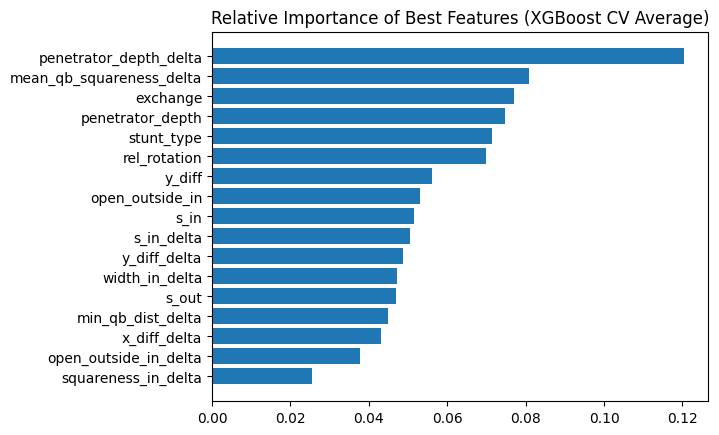

In [16]:
best_features_sorted = xgbcv.get_top_n_features(n=len(best_features), return_scores = True).sort_values(ascending = True)
best_features_sorted.to_csv('../../data/xgb_best_feat_imp.csv')
index = np.arange(0,len(best_features_sorted))
#plt.figure(figsize = (8,8))
plt.barh(index, best_features_sorted)
labels = best_features_sorted.index.tolist()
plt.gca().set_yticks(index)
plt.gca().set_yticklabels(labels)
plt.title("Relative Importance of Best Features (XGBoost CV Average)")
plt.savefig(os.path.join(plots_dir, 'feat_importance_best_xgb.png'), bbox_inches = 'tight')